In [1]:
import domain as d
import mesh as m
import matplotlib.pyplot as plt
import numpy as np

### read domain and mesh

In [5]:
#directory = "/Users/leo/WORKDIR/rascas-dev/data/test_data_run41/"
directory = "../../tests_CDD/"

cdom = d.domain.read(directory+"compute_domain.dom")
cdom.info()

domain INFO:
|_shape     = slab
|_zc        = 0.9
|_thickness = 0.2


In [6]:
mdom = m.mesh(filename=directory+"domain_1.mesh")

-----> reading mesh in file  ../../tests_CDD/domain_1.mesh
-----> domain
domain type = slab
domain center = [0.9]
-----> mesh
ncoarse = 1
noct    = 509417
ncell   = 4075337
nleaf   = 3473408
INFO father    (509417,) 1 4075329
INFO son       (4075337,) -3473408 509417
INFO nbor      (6, 509417) 1 4075329
INFO octlevel  (509417,) 1 8
INFO xoct      (3, 509417) 0.00390625 0.99609375
-----> gas
INFO gas v: (3, 3473408) -4314076.61437988 5526190.185546871
INFO gas nHI: (3473408,) 0.09289858506071695 0.25497675077322746
INFO gas dopwidth: (3473408,) 165970.71401678183 165970.99184980313
INFO gas ndust: (3473408,) 0.0 0.0
boxsize [cm] = 9.08807926708157e+23
-----> get xleaf
ind info:  (1, 3473408) 1 8
ioct info: (1, 3473408) 7 509416
cell_level info: (1, 3473408) 8 8
[-0.5 -0.5 -0.5]
[ 0.5 -0.5 -0.5]
[-0.5  0.5 -0.5]
[ 0.5  0.5 -0.5]
[-0.5 -0.5  0.5]
[ 0.5 -0.5  0.5]
[-0.5  0.5  0.5]
[0.5 0.5 0.5]
INFO dx:    (3473408,) 0.00390625 0.00390625
INFO xleaf: (3, 3473408) 0.001953125 0.998046875
--

### Phase diagram

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


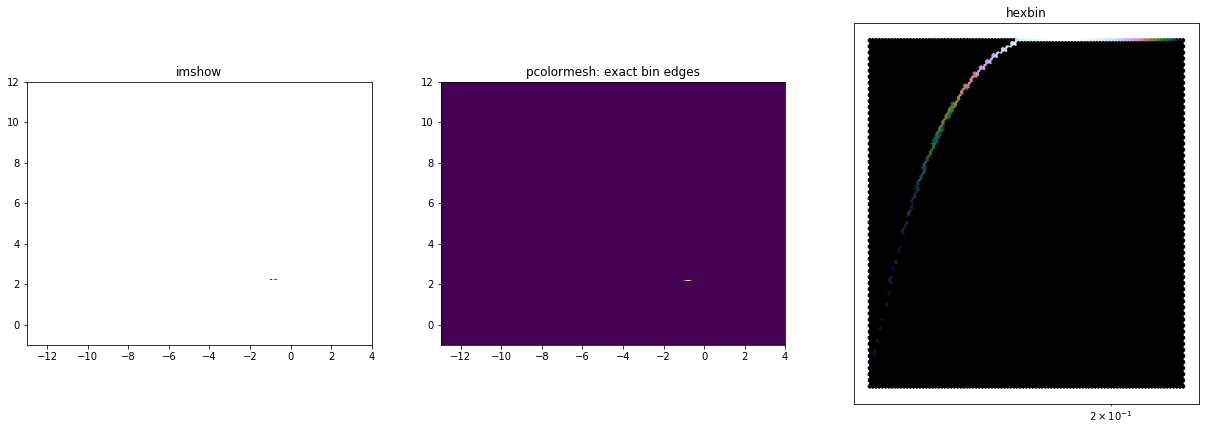

In [4]:
# get T and nHI

kb      = 1.3806200e-16       #![erg/K] Boltzman constant
mp      = 1.66e-24            #![g] proton mass
pseudoTemp = (mdom.gas.dopwidth)**2. / 2.0 / kb * mp
density    = mdom.gas.nhi

# MAPS

# imshow version
fig = plt.figure(figsize=(21,7))
ax = fig.add_subplot(131)
ax.set_title('imshow')
hhi, yi, xi = np.histogram2d( np.log10(pseudoTemp), np.log10(density), bins=200, range=[ [-1.,12.], [-13.,4.]] )
plt.imshow(np.log10(hhi),interpolation='nearest', origin='low', extent=[xi[0], xi[-1], yi[0], yi[-1]] , cmap='Spectral' )

# pcolormesh version
ax = fig.add_subplot(132)
ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xi, yi)
ax.pcolormesh(X, Y, np.log10(hhi+1))
ax.set_aspect('equal')

# hexbin version
ax = fig.add_subplot(133)
ax.set_title('hexbin')
plt.hexbin(density, pseudoTemp, gridsize=100, bins='log' ,xscale='log', yscale='log', cmap='cubehelix')

plt.show()


### MAP mesh

(509417,)


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


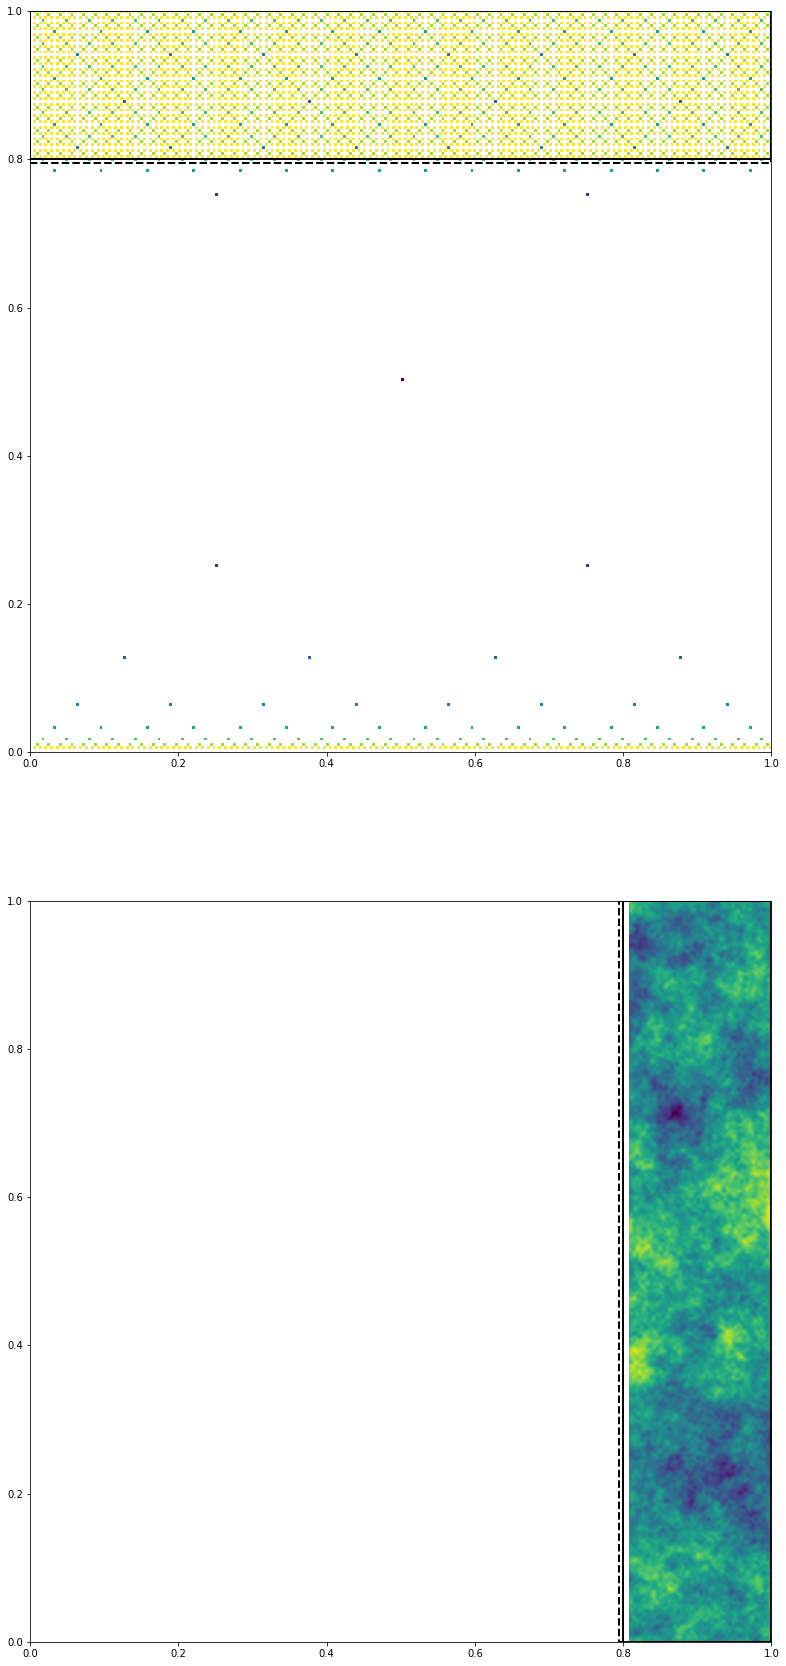

In [9]:
#ii = np.where(mdom.octlevel == 14)
#xx = mdom.xoct[1,ii]
#yy = mdom.xoct[0,ii]
xx = mdom.xoct[2,:]
yy = mdom.xoct[0,:]

xx=xx.reshape(xx.size)
yy=yy.reshape(yy.size)

print(np.shape(xx))

# oct
(num1, xedges1, yedges1) = np.histogram2d(xx,yy,bins=256,range=((0.,1.),(0.,1.)))
# leaf cell
(num2, xedges2, yedges2) = np.histogram2d(mdom.gas.xleaf[0,:],mdom.gas.xleaf[2,:],\
                                          bins=256,range=((0.,1.),(0.,1.)), weights=mdom.gas.nhi)


fig2 = plt.figure(figsize=(30,30))

ax1 = plt.subplot(2,1,1)
plt.imshow(np.log10(num1),interpolation='nearest', origin='low', 
           extent=[xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]])

lim = d.overplot_limits(cdom, projection='zx')
limmesh = d.overplot_limits(mdom.domain,linestyle='dashed',projection='zx')
ax1.add_collection(lim)
ax1.add_collection(limmesh)

ax2 = plt.subplot(2,1,2)
plt.imshow(np.log10(num2),interpolation='spline36', origin='low', 
           extent=[xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]])
lim = d.overplot_limits(cdom, projection='xz')
limmesh = d.overplot_limits(mdom.domain,linestyle='dashed',projection='xz')
ax2.add_collection(lim)
ax2.add_collection(limmesh)

plt.show()